# 🙋🏾‍♂️Info
* Author: Diego Ulysses de Melo
* https://diegoumelo.owlstown.net/
* Date: 27/12/2022

# 🧾 Table of Contents
* 1. Preparing Tool Box
* 2. Reading the Data
* 3. Data Cleaning and Pre-processing
* 4. Data Analysis              
    4.1. Market Share of Retailers     
    4.2. Total Sales per Product    
    4.3. Total Sales per Region    
    4.4. Total Sales by Month

# 🔧1. Preparing Tool Box

In [32]:
from matplotlib.ticker import EngFormatter

import calendar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

In [4]:
import os
for dirname, _, filenames in os.walk('\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

\data\Adidas_US_Sales_Datasets.xlsx


# 📂2. Reading the Data

In [5]:
# Create a DataFrame containing Adidas Sales dataset
data = pd.read_excel('\data\Adidas_US_Sales_Datasets.xlsx')

# 🛁3. Data Cleaning and Pre-processing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9652 entries, 0 to 9651
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   9649 non-null   object 
 2   Unnamed: 2   9650 non-null   object 
 3   Unnamed: 3   9649 non-null   object 
 4   Unnamed: 4   9649 non-null   object 
 5   Unnamed: 5   9649 non-null   object 
 6   Unnamed: 6   9649 non-null   object 
 7   Unnamed: 7   9649 non-null   object 
 8   Unnamed: 8   9649 non-null   object 
 9   Unnamed: 9   9649 non-null   object 
 10  Unnamed: 10  9649 non-null   object 
 11  Unnamed: 11  9649 non-null   object 
 12  Unnamed: 12  9649 non-null   object 
 13  Unnamed: 13  9649 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.0+ MB


Initially, the DataFrame contains 14 columns and 9652 rows.

In [7]:
data.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,NaN,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,NaN,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,NaN,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,NaN,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
9,NaN,Foot Locker,1185732,2020-01-06 00:00:00,Northeast,New York,New York,Women's Apparel,50,1000,500000,125000,0.25,In-store


In [8]:
# Remove the column 'Unnamed: 0'
data.drop('Unnamed: 0', axis=1, inplace=True)

# Remove rows 0, 1 and 2
data.drop(labels=[0, 1, 2], axis=0, inplace=True)

In [9]:
data.head(10)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
9,Foot Locker,1185732,2020-01-06 00:00:00,Northeast,New York,New York,Women's Apparel,50,1000,500000,125000,0.25,In-store
10,Foot Locker,1185732,2020-01-07 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1250,625000,312500,0.5,In-store
11,Foot Locker,1185732,2020-01-08 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,900,450000,135000,0.3,Outlet
12,Foot Locker,1185732,2020-01-21 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,950,380000,133000,0.35,Outlet


In [10]:
# Copy the row 0 as the column name
data.columns = data.iloc[0]

In [11]:
data.head(10)

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
9,Foot Locker,1185732,2020-01-06 00:00:00,Northeast,New York,New York,Women's Apparel,50,1000,500000,125000,0.25,In-store
10,Foot Locker,1185732,2020-01-07 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1250,625000,312500,0.5,In-store
11,Foot Locker,1185732,2020-01-08 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,900,450000,135000,0.3,Outlet
12,Foot Locker,1185732,2020-01-21 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,950,380000,133000,0.35,Outlet


In [12]:
# Remove the row with index 3, and reset the DataFrame index
data.drop(labels=[3], axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [13]:
# Analyzing the duplicates
print(f'{data.duplicated().sum()} duplicated records in '
      f'{len(data)} total records.',
      f'Resulting in {data.duplicated().sum()/len(data)*100:.1f}% of duplicated records.')

0 duplicated records in 9648 total records. Resulting in 0.0% of duplicated records.


In [14]:
# Is there any null values?
print(data.isnull().values.any())

False


In [15]:
data['date_time'] = pd.to_datetime(data['Invoice Date'], errors='coerce')
data['year'] = data['date_time'].dt.year
data['month_name'] = list(map(lambda x: calendar.month_name[x], data['date_time'].dt.month))
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day

data.drop(columns=['Invoice Date', 'date_time'], inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Region            9648 non-null   object
 3   State             9648 non-null   object
 4   City              9648 non-null   object
 5   Product           9648 non-null   object
 6   Price per Unit    9648 non-null   object
 7   Units Sold        9648 non-null   object
 8   Total Sales       9648 non-null   object
 9   Operating Profit  9648 non-null   object
 10  Operating Margin  9648 non-null   object
 11  Sales Method      9648 non-null   object
 12  year              9648 non-null   int64 
 13  month_name        9648 non-null   object
 14  month             9648 non-null   int64 
 15  day               9648 non-null   int64 
dtypes: int64(3), object(13)
memory usage: 1.2+ MB


In [17]:
data['month_name'] = pd.Categorical(data['month_name'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July',
                                                                   'August', 'September', 'October', 'November', 'December'], ordered=True)

data = data.sort_values(['year', 'month'], ignore_index=True)

In [18]:
data[['Price per Unit', 'Total Sales', 'Operating Profit']] = data[['Price per Unit', 'Total Sales', 'Operating Profit']].astype(str).astype(float)

In [19]:
data.rename(columns={'Retailer ID': 'Retailer_ID', 'Price per Unit': 'Price_per_Unit', 'Units Sold': 'Units_Sold',
                    'Total Sales': 'Total_Sales', 'Operating Profit': 'Operating_Profit', 'Operatin Margin': 'Operatin_Margin',
                    'Sales Method': 'Sales_Method'}, inplace=True)

In [20]:
us_state_abb = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT',
                      'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
                      'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
                      'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
                      'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
                      'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
                      'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
                      'District of Columbia': 'DC', 'American Samoa': 'AS', 'Guam': 'GU', 'Northern Mariana Islands': 'MP', 'Puerto Rico': 'PR',
                      'United States Minor Outlying Islands': 'UM', 'U.S. Virgin Islands': 'VI'}
data['State_Abb']=data['State'].map(us_state_abb)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Retailer          9648 non-null   object  
 1   Retailer_ID       9648 non-null   object  
 2   Region            9648 non-null   object  
 3   State             9648 non-null   object  
 4   City              9648 non-null   object  
 5   Product           9648 non-null   object  
 6   Price_per_Unit    9648 non-null   float64 
 7   Units_Sold        9648 non-null   object  
 8   Total_Sales       9648 non-null   float64 
 9   Operating_Profit  9648 non-null   float64 
 10  Operating Margin  9648 non-null   object  
 11  Sales_Method      9648 non-null   object  
 12  year              9648 non-null   int64   
 13  month_name        9648 non-null   category
 14  month             9648 non-null   int64   
 15  day               9648 non-null   int64   
 16  State_Abb         9648 n

Finally, after cleaning the initial DataFrame by removing columns and rows with NaN values,
we can see the column's names correctly assigned.
From the information contained in the Invoice Data column, we added five new columns: year, month_name, month, day, and weekend.

In [22]:
data.head(10)

3,Retailer,Retailer_ID,Region,State,City,Product,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating Margin,Sales_Method,year,month_name,month,day,State_Abb
0,Foot Locker,1185732,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.5,In-store,2020,January,1,1,NY
1,Foot Locker,1185732,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.3,In-store,2020,January,1,2,NY
2,Foot Locker,1185732,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,2020,January,1,3,NY
3,Foot Locker,1185732,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,2020,January,1,4,NY
4,Foot Locker,1185732,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.3,In-store,2020,January,1,5,NY
5,Foot Locker,1185732,Northeast,New York,New York,Women's Apparel,50.0,1000,500000.0,125000.0,0.25,In-store,2020,January,1,6,NY
6,Foot Locker,1185732,Northeast,New York,New York,Men's Street Footwear,50.0,1250,625000.0,312500.0,0.5,In-store,2020,January,1,7,NY
7,Foot Locker,1185732,Northeast,New York,New York,Men's Athletic Footwear,50.0,900,450000.0,135000.0,0.3,Outlet,2020,January,1,8,NY
8,Foot Locker,1185732,Northeast,New York,New York,Women's Street Footwear,40.0,950,380000.0,133000.0,0.35,Outlet,2020,January,1,21,NY
9,Foot Locker,1185732,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,371250.0,129937.5,0.35,Outlet,2020,January,1,22,NY


# 🔎4. Data Analysis

In [94]:
#Group the data by feature and sum the total sales
colors = ['#3f4788', '#365c8d', '#277f8e', '#1fa187', '#4ac16d', '#a0da39']

def pieplot(df, feature):
    df = df[[feature, 'Total_Sales']].groupby(feature, as_index=False).sum()
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.pie(df['Total_Sales'], labels=df[feature], autopct='%1.1f%%', colors=colors, wedgeprops = {'linewidth':0.5, 'edgecolor':'white'}, shadow=True, startangle=90)
    ax.set_title(f'Total Sales by {feature}')
    ax.legend(df[feature],
          title=feature,
          loc="center left",
          bbox_to_anchor=(1.1, 0.35, 0, 1))


    #Show the plot
    print(df)
    print(f'\n{df.describe()}')
    plt.show()

#    4.1. Market Share of Retailers

3       Retailer  Total_Sales
0         Amazon   77698912.0
1    Foot Locker  220094720.0
2         Kohl's  102114753.0
3  Sports Direct  182470997.0
4        Walmart   74558410.0
5      West Gear  242964333.0

3       Total_Sales
count  6.000000e+00
mean   1.499837e+08
std    7.459474e+07
min    7.455841e+07
25%    8.380287e+07
50%    1.422929e+08
75%    2.106888e+08
max    2.429643e+08


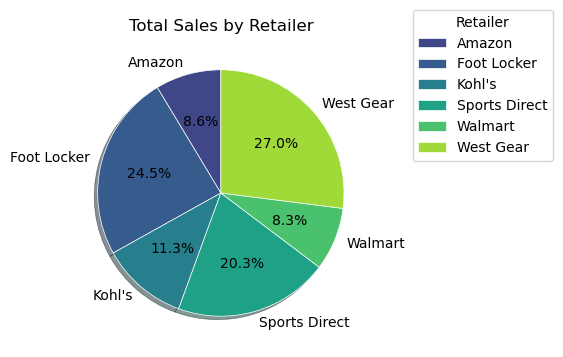

In [95]:
pieplot(data, 'Retailer')

Our dataset contains sales information for six retailers, averaging a sales amount of 150M for each. About 50% of total sales are concentrated in two of them, in the first place, West Gear with 27.0% with 242M, followed by Foot Locker with 24.5% with 220M.

# 4.2. Total Sales per Product

3                    Product  Total_Sales
0              Men's Apparel  123728632.0
1    Men's Athletic Footwear  153673680.0
2      Men's Street Footwear  208826244.0
3            Women's Apparel  179038860.0
4  Women's Athletic Footwear  106631896.0
5    Women's Street Footwear  128002813.0

3       Total_Sales
count  6.000000e+00
mean   1.499837e+08
std    3.839826e+07
min    1.066319e+08
25%    1.247972e+08
50%    1.408382e+08
75%    1.726976e+08
max    2.088262e+08


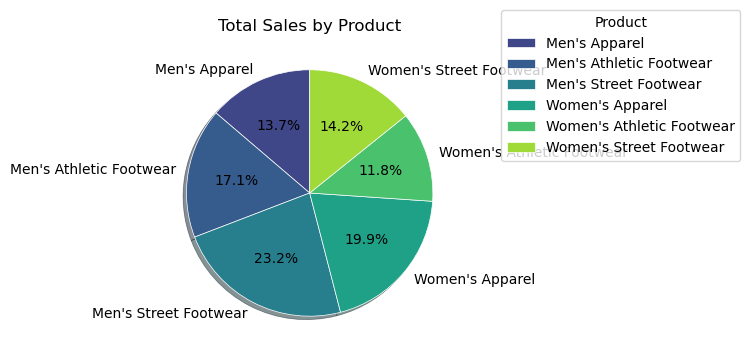

In [96]:
pieplot(data, 'Product')

Men's Street Footwear has the highest sales amount.

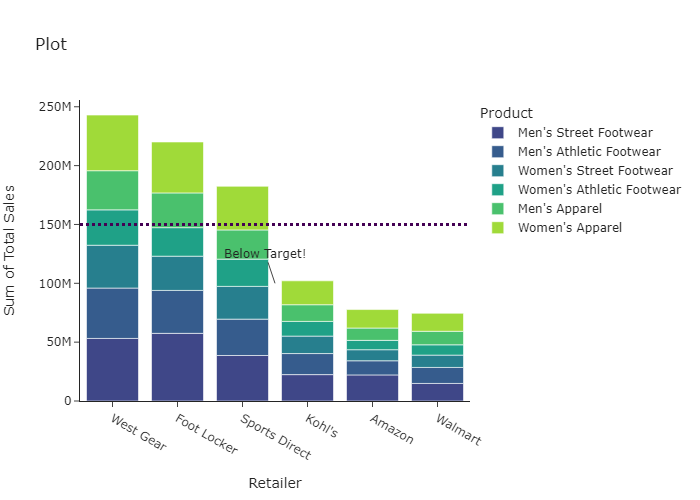

In [81]:
#product_order={'Product': ["Men's Street Footwear", "Women's Apparel", "Men's Athletic Footwear", "Women's Street Footwear", "Men's Apparel", "Women's Athletic Footwear"]}

fig = px.histogram(data, x='Retailer', y='Total_Sales', color='Product', title='Plot', color_discrete_sequence=colors, template='simple_white')
fig.update_xaxes(title='Retailer')
fig.update_yaxes(title='Sum of Total Sales')
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.add_shape( # add a horizontal "target" line
    type='line', line_color='#440154', line_width=3, opacity=1, line_dash='dot',
    x0=0, x1=1, xref='paper', y0=1.5e8, y1=1.5e8, yref='y'
)
fig.add_annotation( # add a text callout with arrow
    text='Below Target!', y=1e8)

# Show figure
# Added 'png' to save the figure in the notebook as static images to show in GitHub
fig.show('png') 

# 4.4. Sales Method

3 Sales_Method  Total_Sales
0     In-store  356643750.0
1       Online  247672882.0
2       Outlet  295585493.0

3       Total_Sales
count  3.000000e+00
mean   2.999674e+08
std    5.461743e+07
min    2.476729e+08
25%    2.716292e+08
50%    2.955855e+08
75%    3.261146e+08
max    3.566438e+08


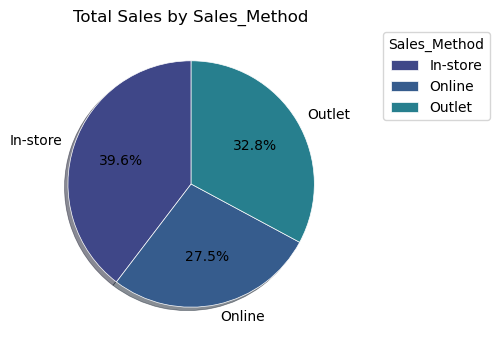

In [97]:
pieplot(data, 'Sales_Method')

In in-store and outlets appear as the preferred buying method of customers, representing almost three-quarters (72.4%) of total sales.

# 4.5. Total Sales by Month

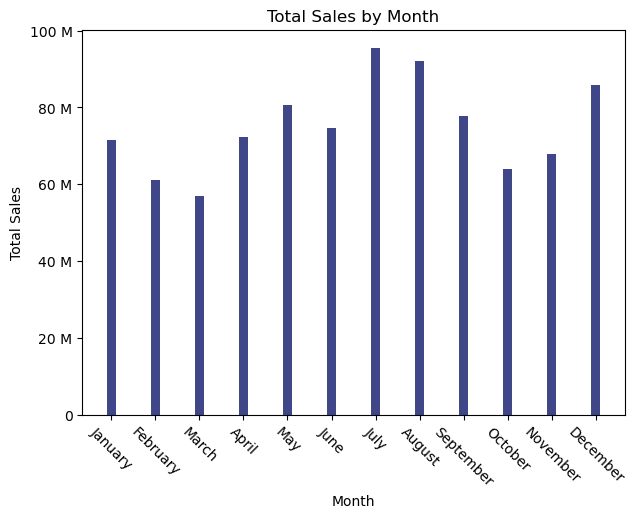

In [29]:
month_sales = data[['month_name', 'Total_Sales']].groupby('month_name', as_index=False, sort=False).sum()
formatter = EngFormatter()
color_bar=['#3f4788']

sort_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(month_sales['month_name'], month_sales['Total_Sales'], width=0.2, color=color_bar)
ax.set_title('Total Sales by Month')
ax.set_ylabel('Total Sales')
ax.set_xlabel('Month')
ax.yaxis.set_major_formatter(formatter)
plt.xticks(month_sales['month_name'], rotation=-45)
    
#Show the plot
plt.show()

In the available history, the month of July has the highest total sales, while March has the lowest value.

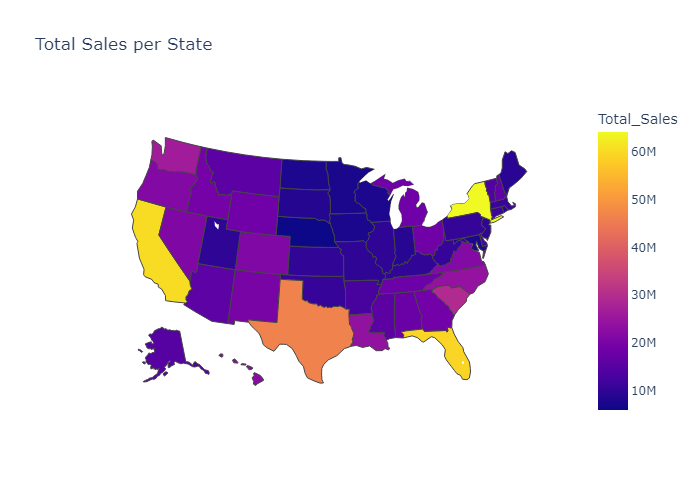

In [30]:
states = data[['State_Abb','Total_Sales']].groupby('State_Abb', as_index=False).sum()

fig = px.choropleth(states, locations='State_Abb', color='Total_Sales', locationmode='USA-states', scope='usa', title="Total Sales per State")

# Show figure
# Added 'png' to save the figure in the notebook as static images to show in GitHub
fig.show('png')